<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Реализация-бустинга-своими-руками" data-toc-modified-id="Реализация-бустинга-своими-руками-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Реализация бустинга своими руками</a></span><ul class="toc-item"><li><span><a href="#Бустинг-для-задачи-регресии" data-toc-modified-id="Бустинг-для-задачи-регресии-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Бустинг для задачи регресии</a></span><ul class="toc-item"><li><span><a href="#Обучение-(fit)" data-toc-modified-id="Обучение-(fit)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Обучение (fit)</a></span></li><li><span><a href="#Предсказание-на-новых-записях-(predict)" data-toc-modified-id="Предсказание-на-новых-записях-(predict)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Предсказание на новых записях (predict)</a></span></li><li><span><a href="#Почему-residual-=-y_true---y_pred" data-toc-modified-id="Почему-residual-=-y_true---y_pred-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Почему residual = y_true - y_pred</a></span></li><li><span><a href="#Библиотека-sympy-для-вычисления-производной" data-toc-modified-id="Библиотека-sympy-для-вычисления-производной-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Библиотека sympy для вычисления производной</a></span></li></ul></li><li><span><a href="#Бустинг-для-бинарной-классификации" data-toc-modified-id="Бустинг-для-бинарной-классификации-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Бустинг для бинарной классификации</a></span><ul class="toc-item"><li><span><a href="#Объяснение-формулы-для-градиента-в-случае-классификации" data-toc-modified-id="Объяснение-формулы-для-градиента-в-случае-классификации-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Объяснение формулы для градиента в случае классификации</a></span></li><li><span><a href="#Проверка-формулы-производной-с-помощью-sympy" data-toc-modified-id="Проверка-формулы-производной-с-помощью-sympy-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Проверка формулы производной с помощью sympy</a></span></li><li><span><a href="#Обучение-(fit)" data-toc-modified-id="Обучение-(fit)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Обучение (fit)</a></span></li><li><span><a href="#Предсказание-(predict)" data-toc-modified-id="Предсказание-(predict)-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Предсказание (predict)</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Задание</a></span></li></ul></li></ul></li><li><span><a href="#Работа-с-несбалансированными-классами" data-toc-modified-id="Работа-с-несбалансированными-классами-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Работа с несбалансированными классами</a></span><ul class="toc-item"><li><span><a href="#Undersampling" data-toc-modified-id="Undersampling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Undersampling</a></span><ul class="toc-item"><li><span><a href="#RandomUnderSampler" data-toc-modified-id="RandomUnderSampler-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>RandomUnderSampler</a></span></li><li><span><a href="#TomekLinks" data-toc-modified-id="TomekLinks-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>TomekLinks</a></span></li><li><span><a href="#ClusterCentroids" data-toc-modified-id="ClusterCentroids-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>ClusterCentroids</a></span></li></ul></li><li><span><a href="#Oversampling" data-toc-modified-id="Oversampling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Oversampling</a></span><ul class="toc-item"><li><span><a href="#RandomOverSampler" data-toc-modified-id="RandomOverSampler-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>RandomOverSampler</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#BorderlineSMOTE" data-toc-modified-id="BorderlineSMOTE-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>BorderlineSMOTE</a></span></li><li><span><a href="#ADASYN" data-toc-modified-id="ADASYN-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>ADASYN</a></span></li></ul></li></ul></li></ul></div>

# Реализация бустинга своими руками

## Бустинг для задачи регресии

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

Создадим датасет для задачи регрессии:

In [2]:
n_features = 2
n_samples = 3_000
features = ['x_' + str(i) for i in range(n_features)]
X, y = make_regression(n_samples=n_samples, n_features=n_features, random_state=42)

Объединим всё в один датафрейм:

In [3]:
df = pd.DataFrame(X)
df.columns = features
df['y_true'] = y
df

,x_0,x_1,y_true
0,1.356240,0.812526,55.982369
1,-1.153692,0.681362,-1.442474
2,-0.393339,0.368673,4.096386
3,0.197911,1.735964,62.586602
4,0.299293,0.742095,31.289131
...,...,...,...
2995,-0.428655,-1.846573,-71.181553
2996,-0.305611,2.755218,86.244649
2997,0.039447,0.424067,15.100899
2998,1.452756,-0.294456,20.776423


Разделим на train и test:

In [4]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)
df_train.shape, df_test.shape

((2100, 3), (900, 3))

Для упрощения кода сделаем присвоение:

In [5]:
df = df_train.copy()

# И сбросим индексы
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Обучение (fit)

В качестве первого предсказания возьмем среднее значение таргета по всем наблюдениям (обычно в качестве первого предсказанания берется слабое дерево решений):

In [6]:
initial_prediction = df['y_true'].mean()
df['y_pred_0'] = initial_prediction
df

,x_0,x_1,y_true,y_pred_0
0,0.472630,0.018017,10.588522,0.170683
1,-1.148263,0.811397,3.047197,0.170683
2,0.260674,0.494030,22.127308,0.170683
3,0.131065,0.400481,16.242415,0.170683
4,1.528031,0.671531,54.866974,0.170683
...,...,...,...,...
2095,-0.667780,-0.936506,-45.612846,0.170683
2096,0.081874,-0.485364,-14.600824,0.170683
2097,-0.020099,0.963907,32.006180,0.170683
2098,1.436335,1.186735,70.264318,0.170683


Замерим качество:

In [7]:
print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred_0']))
print('MSE: %.2f' % mean_squared_error(df['y_true'], df['y_pred_0']))

MAE: 31.48
MSE: 1567.05


Посчитаем residuals (остатки):

In [8]:
df['residual_0'] = df['y_true'] - df['y_pred_0']
df

,x_0,x_1,y_true,y_pred_0,residual_0
0,0.472630,0.018017,10.588522,0.170683,10.417839
1,-1.148263,0.811397,3.047197,0.170683,2.876514
2,0.260674,0.494030,22.127308,0.170683,21.956626
3,0.131065,0.400481,16.242415,0.170683,16.071733
4,1.528031,0.671531,54.866974,0.170683,54.696292
...,...,...,...,...,...
2095,-0.667780,-0.936506,-45.612846,0.170683,-45.783528
2096,0.081874,-0.485364,-14.600824,0.170683,-14.771507
2097,-0.020099,0.963907,32.006180,0.170683,31.835498
2098,1.436335,1.186735,70.264318,0.170683,70.093635


Далее будем выполнять шаги градиентного бустинга (обучение DecisionTreeRegressor на остатках):

In [9]:
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_1.fit(df[features], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

Визуализация построенного дерева:

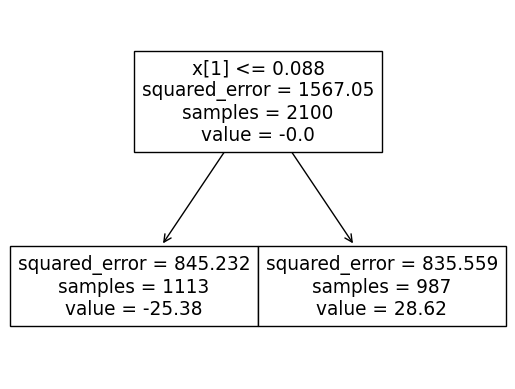

In [10]:
plot_tree(tree_1);

In [11]:
# Определим learning_rate
lr = 0.1

# predict_new = predict_old + learning_rate * predict_residual
df['tree_pred_1'] = tree_1.predict(df[features])
df['y_pred_1'] = df['y_pred_0'] + lr * df['tree_pred_1']
df

,x_0,x_1,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,0.472630,0.018017,10.588522,0.170683,10.417839,-25.379795,-2.367297
1,-1.148263,0.811397,3.047197,0.170683,2.876514,28.619769,3.032659
2,0.260674,0.494030,22.127308,0.170683,21.956626,28.619769,3.032659
3,0.131065,0.400481,16.242415,0.170683,16.071733,28.619769,3.032659
4,1.528031,0.671531,54.866974,0.170683,54.696292,28.619769,3.032659
...,...,...,...,...,...,...,...
2095,-0.667780,-0.936506,-45.612846,0.170683,-45.783528,-25.379795,-2.367297
2096,0.081874,-0.485364,-14.600824,0.170683,-14.771507,-25.379795,-2.367297
2097,-0.020099,0.963907,32.006180,0.170683,31.835498,28.619769,3.032659
2098,1.436335,1.186735,70.264318,0.170683,70.093635,28.619769,3.032659


In [12]:
print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred_0']))
print('MSE: %.2f' % mean_squared_error(df['y_true'], df['y_pred_0']))
print()
print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred_1']))
print('MSE: %.2f' % mean_squared_error(df['y_true'], df['y_pred_1']))

MAE: 31.48
MSE: 1567.05

MAE: 29.81
MSE: 1429.04


Снова посчитаем остатки:

In [13]:
df['residual_1'] = df['y_true'] - df['y_pred_1']
df

,x_0,x_1,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,0.472630,0.018017,10.588522,0.170683,10.417839,-25.379795,-2.367297,12.955818
1,-1.148263,0.811397,3.047197,0.170683,2.876514,28.619769,3.032659,0.014537
2,0.260674,0.494030,22.127308,0.170683,21.956626,28.619769,3.032659,19.094649
3,0.131065,0.400481,16.242415,0.170683,16.071733,28.619769,3.032659,13.209756
4,1.528031,0.671531,54.866974,0.170683,54.696292,28.619769,3.032659,51.834315
...,...,...,...,...,...,...,...,...
2095,-0.667780,-0.936506,-45.612846,0.170683,-45.783528,-25.379795,-2.367297,-43.245549
2096,0.081874,-0.485364,-14.600824,0.170683,-14.771507,-25.379795,-2.367297,-12.233527
2097,-0.020099,0.963907,32.006180,0.170683,31.835498,28.619769,3.032659,28.973521
2098,1.436335,1.186735,70.264318,0.170683,70.093635,28.619769,3.032659,67.231659


И снова обучим DecisionTreeRegressor, уже на новых остатках:

In [14]:
tree_2 = DecisionTreeRegressor(max_depth=1)
tree_2.fit(df[features], df['residual_1'])
df['y_pred_2'] = df['y_pred_1'] + lr * tree_2.predict(df[features])
df

,x_0,x_1,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,0.472630,0.018017,10.588522,0.170683,10.417839,-25.379795,-2.367297,12.955818,-0.365119
1,-1.148263,0.811397,3.047197,0.170683,2.876514,28.619769,3.032659,0.014537,5.034837
2,0.260674,0.494030,22.127308,0.170683,21.956626,28.619769,3.032659,19.094649,5.034837
3,0.131065,0.400481,16.242415,0.170683,16.071733,28.619769,3.032659,13.209756,5.034837
4,1.528031,0.671531,54.866974,0.170683,54.696292,28.619769,3.032659,51.834315,5.034837
...,...,...,...,...,...,...,...,...,...
2095,-0.667780,-0.936506,-45.612846,0.170683,-45.783528,-25.379795,-2.367297,-43.245549,-5.352751
2096,0.081874,-0.485364,-14.600824,0.170683,-14.771507,-25.379795,-2.367297,-12.233527,-5.352751
2097,-0.020099,0.963907,32.006180,0.170683,31.835498,28.619769,3.032659,28.973521,5.034837
2098,1.436335,1.186735,70.264318,0.170683,70.093635,28.619769,3.032659,67.231659,5.034837


In [15]:
print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred_0']))
print('MSE: %.2f' % mean_squared_error(df['y_true'], df['y_pred_0']))
print()
print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred_1']))
print('MSE: %.2f' % mean_squared_error(df['y_true'], df['y_pred_1']))
print()
print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred_2']))
print('MSE: %.2f' % mean_squared_error(df['y_true'], df['y_pred_2']))

MAE: 31.48
MSE: 1567.05

MAE: 29.81
MSE: 1429.04

MAE: 28.40
MSE: 1315.47


Объединим в for loop

In [16]:
df = df[features + ['y_true']].copy()
df

,x_0,x_1,y_true
0,0.472630,0.018017,10.588522
1,-1.148263,0.811397,3.047197
2,0.260674,0.494030,22.127308
3,0.131065,0.400481,16.242415
4,1.528031,0.671531,54.866974
...,...,...,...
2095,-0.667780,-0.936506,-45.612846
2096,0.081874,-0.485364,-14.600824
2097,-0.020099,0.963907,32.006180
2098,1.436335,1.186735,70.264318


In [17]:
n_iter = 10
lr = 0.1
trees = []

# Делаем первое предсказание
initial_prediction = df['y_true'].mean()
df['y_pred'] = initial_prediction

for i in range(n_iter):
    df['residual'] = df['y_true'] - df['y_pred']
    
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[features], df['residual'])
    
    df['y_pred'] = df['y_pred'] + lr * tree.predict(df[features])
    
    trees.append(tree)
    
    print('MAE: %.2f' % mean_absolute_error(df['y_true'], df['y_pred']))

MAE: 29.81
MAE: 28.40
MAE: 27.19
MAE: 26.20
MAE: 25.34
MAE: 24.55
MAE: 23.80
MAE: 22.88
MAE: 22.29
MAE: 21.52


### Предсказание на новых записях (predict)

In [18]:
initial_prediction

0.17068259180197584

In [19]:
trees

[DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1)]

In [20]:
df_test

,x_0,x_1,y_true
0,-0.124021,-0.569450,-21.778592
1,0.692723,0.225264,22.209896
2,-0.824612,0.307404,-7.073888
3,1.414187,0.587392,49.631618
4,0.078143,-0.816217,-25.811212
...,...,...,...
895,0.129221,2.445752,85.016669
896,0.239247,-1.072743,-31.039385
897,0.470044,0.432263,24.471224
898,0.472406,-0.956436,-22.201725


In [21]:
# Берем initial_prediction с train датасета
df_test['y_pred'] = initial_prediction # X['y_true'].mean()
df_test

,x_0,x_1,y_true,y_pred
0,-0.124021,-0.569450,-21.778592,0.170683
1,0.692723,0.225264,22.209896,0.170683
2,-0.824612,0.307404,-7.073888,0.170683
3,1.414187,0.587392,49.631618,0.170683
4,0.078143,-0.816217,-25.811212,0.170683
...,...,...,...,...
895,0.129221,2.445752,85.016669,0.170683
896,0.239247,-1.072743,-31.039385,0.170683
897,0.470044,0.432263,24.471224,0.170683
898,0.472406,-0.956436,-22.201725,0.170683


In [22]:
for tree in tqdm(trees):
    df_test['y_pred'] = df_test['y_pred'] + lr * tree.predict(df_test[features])
    print('MAE: %.2f' % mean_absolute_error(df_test['y_true'], df_test['y_pred']))

  0%|          | 0/10 [00:00<?, ?it/s]

MAE: 30.07
MAE: 28.64
MAE: 27.47
MAE: 26.44
MAE: 25.54
MAE: 24.77
MAE: 24.04
MAE: 23.10
MAE: 22.50
MAE: 21.73


In [23]:
df_test

,x_0,x_1,y_true,y_pred
0,-0.124021,-0.569450,-21.778592,-10.788908
1,0.692723,0.225264,22.209896,11.015158
2,-0.824612,0.307404,-7.073888,4.471564
3,1.414187,0.587392,49.631618,15.486798
4,0.078143,-0.816217,-25.811212,-11.877713
...,...,...,...,...
895,0.129221,2.445752,85.016669,19.522085
896,0.239247,-1.072743,-31.039385,-16.083019
897,0.470044,0.432263,24.471224,11.015158
898,0.472406,-0.956436,-22.201725,-16.083019


### Почему residual = y_true - y_pred

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG'>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*fHenn7NVqcWvw25D3-zRiQ.png'>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*LLbC4TstqzXQ3hzA8wCmeg.png'>

### Библиотека sympy для вычисления производной

In [25]:
from sympy import Symbol, diff, log

x = Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
yprime

2*x

-------

In [26]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [27]:
1/2*(y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [28]:
diff(1/2*(y_true - y_pred)**2, y_pred)

1.0*y_pred - 1.0*y_true

In [29]:
y_true - y_pred

-y_pred + y_true

## Бустинг для бинарной классификации

### Объяснение формулы для градиента в случае классификации

<img src='https://miro.medium.com/v2/resize:fit:1400/1*KrQqI25cQ91OmEfZhYiKYg.jpeg'>

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-03-11-33-29.png'>

<img src='https://miro.medium.com/v2/resize:fit:1400/1*xn0T5GWAdViXHDw6zuhMSw.png'>

### Проверка формулы производной с помощью sympy

In [30]:
-(y_true*log(y_pred) + (1-y_true)*log(1-y_pred))

-y_true*log(y_pred) - (1 - y_true)*log(1 - y_pred)

In [31]:
diff(-(y_true*log(y_pred) + (1-y_true)*log(1-y_pred)), y_pred)

(1 - y_true)/(1 - y_pred) - y_true/y_pred

Формула для n_classes > 2:
- https://stats.stackexchange.com/questions/370723/how-to-calculate-the-derivative-of-crossentropy-error-function

Создадим датасет для задачи классификации:

In [90]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_redundant=0)
df = pd.DataFrame(X, columns=features)
df['y_true'] = y

Разделим на train и test:

In [91]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)
print(df_train.shape, df_test.shape)

(2100, 3) (900, 3)


Для упрощения кода сделаем присвоение:

In [92]:
df = df_train.copy()

# И сбросим индексы
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Обучение (fit)

In [93]:
# В качестве первого предсказания возьмем среднее значение таргета на train наборе
initial_prediction = df['y_true'].mean()
df['y_pred'] = initial_prediction
df

,x_0,x_1,y_true,y_pred
0,2.133541,-0.444075,1,0.492857
1,-0.870767,0.543855,0,0.492857
2,-0.643321,-0.738064,0,0.492857
3,0.032856,-0.164947,0,0.492857
4,1.652070,-0.408020,1,0.492857
...,...,...,...,...
2095,1.109644,-1.333960,0,0.492857
2096,2.946033,1.113970,1,0.492857
2097,0.180182,-0.128708,0,0.492857
2098,0.809311,1.244523,1,0.492857


Качество наивного классификатора:

In [94]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(df['y_true'], df['y_pred'])
auc_score

0.5

In [95]:
def loss_function():
    return -((1-df['y_true'])/(1-df['y_pred'])) - (df['y_true']/df['y_pred'])

diff(-(y_true*log(y_pred) + (1-y_true)*log(1-y_pred)), y_pred)
loss_function()

0      -2.028986
1      -1.971831
2      -1.971831
3      -1.971831
4      -2.028986
          ...   
2095   -1.971831
2096   -2.028986
2097   -1.971831
2098   -2.028986
2099   -2.028986
Length: 2100, dtype: float64

for loop для обучения деревьев решений в цикле на остатках (residuals):

In [ ]:
from sklearn.tree import DecisionTreeClassifier


n_iter = 1000
lr = 0.001
trees = []

df['y_pred'] = initial_prediction

# Рассчитываем остатки согласно формулам выше
df['residual'] = loss_function()

for i in range(n_iter):
    # Создаем дерево решений
    tree = DecisionTreeRegressor(max_depth=1)# your code here
    
    # Обучаем дерево решений дерево решений на остатках
    tree.fit(df[features], df['residual']) # your code here)
        
    # Обновляем prediction:
    df['y_pred'] = df['y_pred'] + lr * tree.predict(df[features]) # your code here
    
    # Будем ограничивать предсказания между 0 и 1 (можно вначале пропустить данный шаг)
    # df['y_pred'] = df['y_pred'].apply(np.clip(df['y_pred'], 0, 1))# your code here)
    df['y_pred'] = np.clip(df['y_pred'], 1e-7, 1 - 1e-7)
        
    # Обновляем остатки
    df['residual'] = loss_function() # your code here
        
    # Складываем обученные деревья в массив (они нам понадобятся для предсказаний)
    trees.append(tree) # your code here)
        
    # Выводим AUC на текущей итерации
    print(roc_auc_score(df['y_true'], df['y_pred']))

0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239572702
0.1488807239

In [88]:
df

,x_0,x_1,y_true,y_pred,residual
0,2.335493,-1.995212,0,0.487663,-1.951841
1,1.033745,-0.170064,1,0.487663,-2.050596
2,-1.478784,2.120444,1,0.487569,-2.050990
3,-0.903093,-0.892476,0,0.487663,-1.951841
4,-0.974717,-0.951124,0,0.487663,-1.951841
...,...,...,...,...,...
2095,-0.268839,0.098403,1,0.487569,-2.050990
2096,1.766181,-1.529580,0,0.487663,-1.951841
2097,1.156202,0.914607,1,0.487569,-2.050990
2098,-0.506966,-0.542003,0,0.487663,-1.951841


### Предсказание (predict)

In [58]:
df_test

,x_0,x_1,y_true
0,0.359095,0.710921,0
1,-1.980890,-1.932540,0
2,1.779600,0.763142,1
3,0.531916,1.358485,1
4,1.575460,-2.557025,0
...,...,...,...
895,-2.475336,0.798462,1
896,0.877837,0.613461,0
897,1.233450,0.653772,1
898,-0.258135,0.791249,1


In [37]:
# Берем initial_prediction с train датасета
df_test['y_pred'] = initial_prediction # X['y_true'].mean()
df_test

,x_0,x_1,y_true,y_pred
0,-0.142389,0.243385,0,0.5
1,1.944275,1.851880,1,0.5
2,0.153339,0.926060,1,0.5
3,0.090894,0.416834,0,0.5
4,-1.206709,2.141288,1,0.5
...,...,...,...,...
895,0.460581,-0.186435,0,0.5
896,-1.443453,0.986124,0,0.5
897,2.718872,-5.819239,0,0.5
898,-3.126788,1.150926,1,0.5


In [38]:
for tree in tqdm(trees):
    # Обновляем prediction:
    df_test['y_pred'] += # your code here
    
    # Будем ограничивать предсказания между 0 и 1 (можно вначале пропустить данный шаг)    
    df_test['y_pred'] = df_test['y_pred'].apply(# your code here)
        
    # Выводим AUC на текущей итерации
    # your code here

  0%|          | 0/10 [00:00<?, ?it/s]

AUC: 0.85
AUC: 0.87
AUC: 0.90
AUC: 0.90
AUC: 0.91
AUC: 0.83
AUC: 0.90
AUC: 0.84
AUC: 0.89
AUC: 0.84


In [39]:
df_test

,x_0,x_1,y_true,y_pred
0,-0.142389,0.243385,0,3.726326e-01
1,1.944275,1.851880,1,8.694076e-01
2,0.153339,0.926060,1,8.694076e-01
3,0.090894,0.416834,0,3.726326e-01
4,-1.206709,2.141288,1,8.694076e-01
...,...,...,...,...
895,0.460581,-0.186435,0,3.726326e-01
896,-1.443453,0.986124,0,8.694076e-01
897,2.718872,-5.819239,0,1.000000e-07
898,-3.126788,1.150926,1,8.694076e-01


### Задание

Самостоятельно реализовать градиентный бустинг для классификации, используя приведенные выше формулы для loss/градиента loss для задачи классификации.<br>

Важно. При расчете residual важно не напутать знак выражения (+/-).

Важно. В теории предсказания деревьев могу выйти за рамки отрезка [0,1]. Возможно вам пригодится функция np.clip из пакета numpy 
для того, чтобы ограничить вероятности в пределах [0,1]. Рекомендую попробовать различные варианты:
1. без использования clip
2. clip до [0,1]
3. clip до (1e-7, 1 - 1e-7) - оставляем небольшой отступ от границ отрезка
- https://numpy.org/doc/stable/reference/generated/numpy.clip.html

Также можно попробовать варьировать параметры:
- max_depth
- learning_rate (lr)
- n_iter
- n_features
- n_samples

- https://github.com/hyperopt/hyperopt
- https://github.com/optuna/optuna
- https://github.com/bayesian-optimization/BayesianOptimization
- https://github.com/scikit-optimize/scikit-optimize

# Работа с несбалансированными классами

Одна из популярных библиотек - imblearn. Примеры кода от разработчиков:

- https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html

<img src = 'https://miro.medium.com/v2/0*PkM2asY31sx2rSkR.png'>

<img src = 'https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808331754.png'>

## Undersampling

### RandomUnderSampler

Under-sample the majority class(es) by randomly picking samples with or without replacement.

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

### TomekLinks

https://imbalanced-learn.org/stable/under_sampling.html#tomek-links

<img src='https://mlwhiz.com/images/imbal/1.png'>

### ClusterCentroids

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html

Undersample by generating centroids based on clustering methods.

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

ClusterCentroids makes use of K-means to reduce the number of samples. Therefore, each class will be synthesized with the centroids of the K-means method instead of the original samples:

## Oversampling

SMOTE: Synthetic Data Augmentation for Tabular Data An exploration of SMOTE and some variants like Borderline-SMOTE and ADASYN
https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc

### RandomOverSampler

Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

### SMOTE

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

<img src='https://miro.medium.com/v2/resize:fit:1400/1*GJY7UnJ4WCzqgtrfkCvkdA.png'>

<img src='https://miro.medium.com/v2/resize:fit:2000/format:webp/1*CG712DHQL_ZMS3gAEGd_5w.jpeg'>

### BorderlineSMOTE

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html

<img src='https://miro.medium.com/v2/resize:fit:2000/format:webp/1*p2Ugh8xOQjjwunXmRtN9Cg.jpeg'>

### ADASYN

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html

<img src='https://miro.medium.com/v2/resize:fit:2000/format:webp/1*iXHQaRrdIJLRsxxjEnr67Q.jpeg'>

Примеры с кодом:
- Compare over-sampling samplers https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html
- Effect of the shrinkage factor in random over-sampling
https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_shrinkage_effect.html